In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
p_survived = titanic['survived'].mean() #Mean of 1/0 is the proportion of 1's
print(p_survived)

0.3838383838383838


In [5]:
print(f"Marginal Probability of survival: {p_survived:.2f}")

Marginal Probability of survival: 0.38


In [6]:
p_female = (titanic['sex']=='female').mean()

In [7]:
print(f"Marginal Probability of being female {p_female:.2f}")

Marginal Probability of being female 0.35


In [8]:
p_male = (titanic['sex']=='male').mean()
print(f"Marginal Probability of being male {p_male:.2f}")

Marginal Probability of being male 0.65


In [9]:
# Probability of survival given female
female_passengers = titanic[titanic['sex']=='female']

In [10]:
p_surv_given_female = female_passengers['survived'].mean()

In [11]:
print(f'P(Survived|Female) = {p_surv_given_female:.2f}')

P(Survived|Female) = 0.74


In [12]:
male_passengers = titanic[titanic['sex']=='male']

In [13]:
p_surv_given_male = male_passengers['survived'].mean()

In [14]:
print(f'P(Survived|Male) = {p_surv_given_male:.2f}')

P(Survived|Male) = 0.19


In [15]:
titanic = sns.load_dataset('titanic')

In [16]:
p_female = (titanic['sex']=='female').mean()

In [17]:
p_surv_given_female = titanic[titanic['sex']=='female']['survived'].mean()

In [18]:
p_survived = titanic['survived'].mean()

In [19]:
#Apply Bayes
p_female_given_surv = (p_surv_given_female*p_female)/p_survived
print(f"P(Female|Survived)={p_female_given_surv:.2f}")

P(Female|Survived)=0.68


In [20]:
p_male = (titanic['sex']=='male').mean()

In [21]:
p_surv_given_male = titanic[titanic['sex']=='male']['survived'].mean()

In [22]:
p_survived = titanic['survived'].mean()

In [23]:
p_male_given_surv = (p_surv_given_male*p_male)/p_survived
print(f"P(Male|Survived)={p_male_given_surv:.2f}")

P(Male|Survived)=0.32


In [24]:
from scipy.stats import binom
p_surv = titanic['survived'].mean() # ~0.38
n = 10
k = 4
prob_4_surviviors = binom.pmf(k,n,p_surv)
print(f"P(exactly 4 survivors in 10) = {prob_4_surviviors}")

P(exactly 4 survivors in 10) = 0.24944841300217002


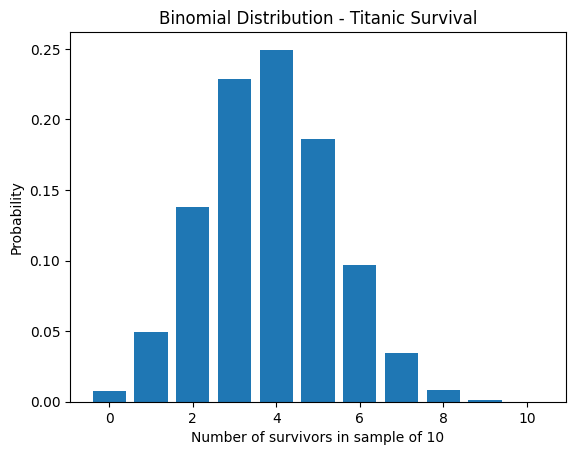

In [25]:
import matplotlib.pyplot as plt
k_values = range(n+1)
probs = binom.pmf(k_values,n,p_surv)
plt.bar(k_values,probs)
plt.xlabel('Number of survivors in sample of 10')
plt.ylabel('Probability')
plt.title('Binomial Distribution - Titanic Survival')
plt.show()

In [26]:
from scipy.stats import poisson
lambda_rate = 20 # avg survivors per lifeboat
k = 18 # exactly 18 survivors
prob_18 = poisson.pmf(k,lambda_rate)
print(f"Exactly 18 survivors = {prob_18:.4f}")

Exactly 18 survivors = 0.0844


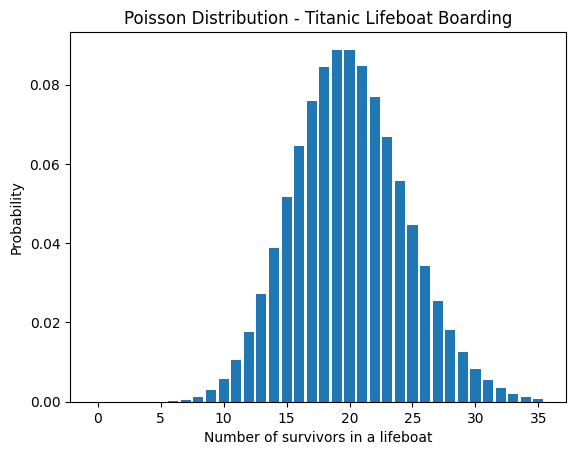

In [27]:
import matplotlib.pyplot as plt
k_values = range(0,36)
probs = poisson.pmf(k_values,lambda_rate)
plt.bar(k_values,probs)
plt.xlabel('Number of survivors in a lifeboat')
plt.ylabel('Probability')
plt.title('Poisson Distribution - Titanic Lifeboat Boarding')
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

#Load titanic dataset
titanic = sns.load_dataset('titanic')
ages = titanic['age'].dropna()

In [29]:
#Calculate mean and std deviation
mu,sigma = ages.mean(),ages.std()

#Generate smooth x values for the curve
x=np.linspace(ages.min(),ages.max(),200)

#PDF values for each x
pdf_vals = norm.pdf(x,mu,sigma)



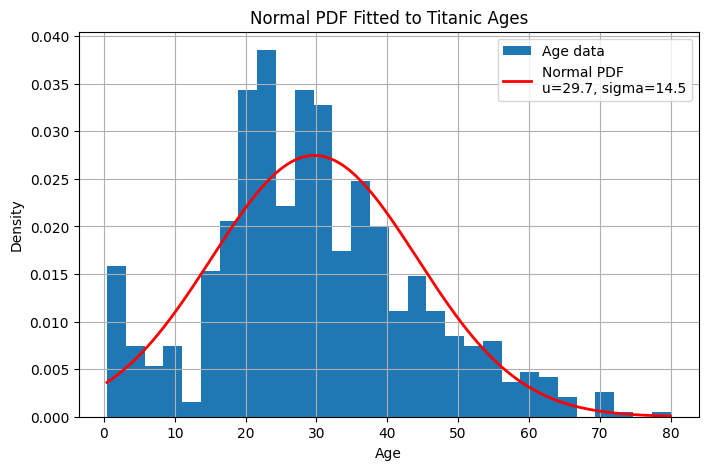

In [30]:
#Plot
plt.figure(figsize=(8,5))
plt.hist(ages,bins=30,density=True,label = 'Age data')
plt.plot(x,pdf_vals,'r-',lw=2,label=f'Normal PDF\nu={mu:.1f}, sigma={sigma:.1f}') #r -red solid line width = 2
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Normal PDF Fitted to Titanic Ages')
plt.legend()
plt.grid(True)
plt.show()

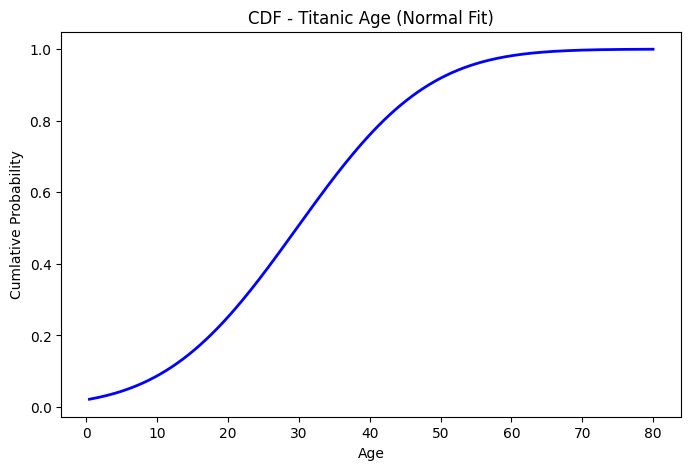

In [31]:
from scipy.stats import norm
#Calculate mean and std
mu,sigma = ages.mean(),ages.std()

#Generate smooth x values for the curve
x=np.linspace(ages.min(),ages.max(),200)

#CDF values for each x
cdf_vals = norm.cdf(x,mu,sigma)

#Plot 
plt.figure(figsize=(8,5))
plt.plot(x,cdf_vals,'b-',lw=2)
plt.xlabel('Age')
plt.ylabel('Cumlative Probability')
plt.title('CDF - Titanic Age (Normal Fit)')
plt.show()

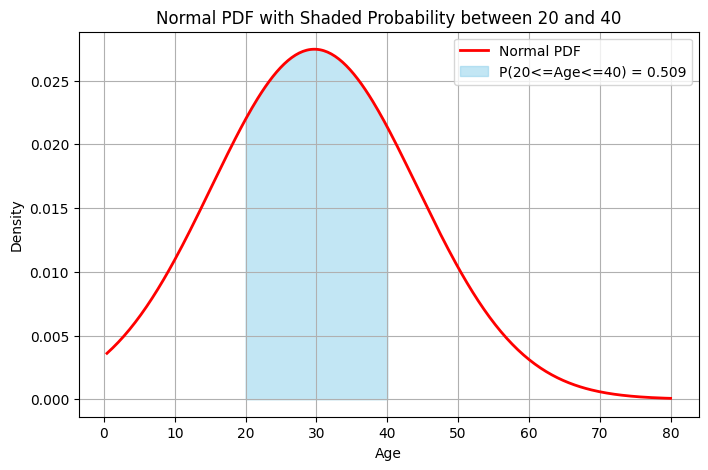

In [32]:
#Mean and std
mu,sigma = ages.mean(),ages.std()

#Smooth x range for curve
x=np.linspace(ages.min(),ages.max(),300)
pdf_vals = norm.pdf(x,mu,sigma)

#Probability between 20 and 40
p_40 = norm.cdf(40,mu,sigma)
p_20 = norm.cdf(20,mu,sigma)
prob_between = p_40-p_20

#Plot PDF
plt.figure(figsize=(8,5))
plt.plot(x,pdf_vals,'r-',lw=2,label='Normal PDF')

#Shade the 20-40 range
x_shade = np.linspace(20,40,200)
plt.fill_between(x_shade,norm.pdf(x_shade,mu,sigma),color='skyblue',alpha=0.5,label=f'P(20<=Age<=40) = {prob_between:.3f}')
#Formatting
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Normal PDF with Shaded Probability between 20 and 40')
plt.legend()
plt.grid(True)
plt.show()

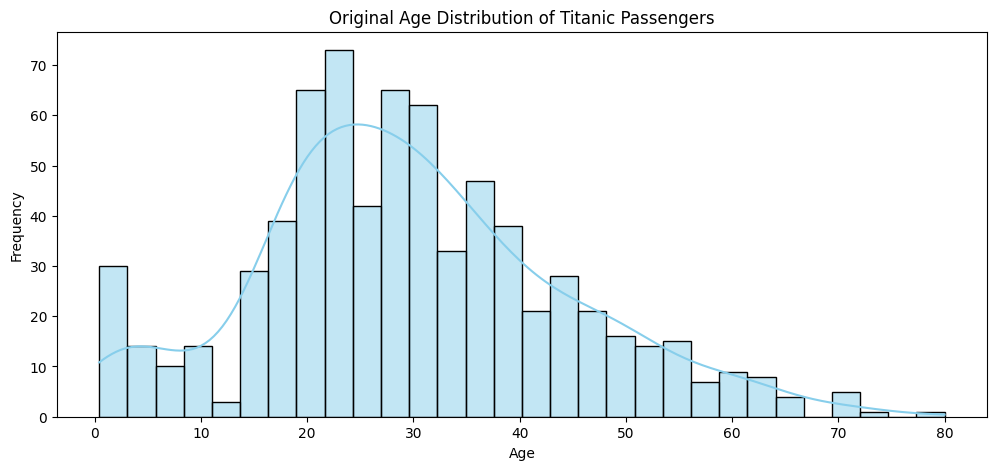

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Titanic dataset (using seaborn's built-in dataset for convenience)
titanic = sns.load_dataset('titanic')

#Drop missing ages for cleaner analysis
ages = titanic['age'].dropna()

#Step 1: Visualize original age distribution (population)
plt.figure(figsize=(12,5))
sns.histplot(ages,bins=30,kde=True,color='skyblue')
plt.title('Original Age Distribution of Titanic Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [34]:
#Step 2: Set parameters for CLT demonstration
sample_size=30 # sample size per draw
num_samples = 1000 #number of samples to draw

#Step 3: Take samples and compute their means
sample_means=[]

for _ in range(num_samples):
    sample=ages.sample(sample_size,replace=True) #random sample with replacement
    sample_means.append(sample.mean())
sample_means= np.array(sample_means)

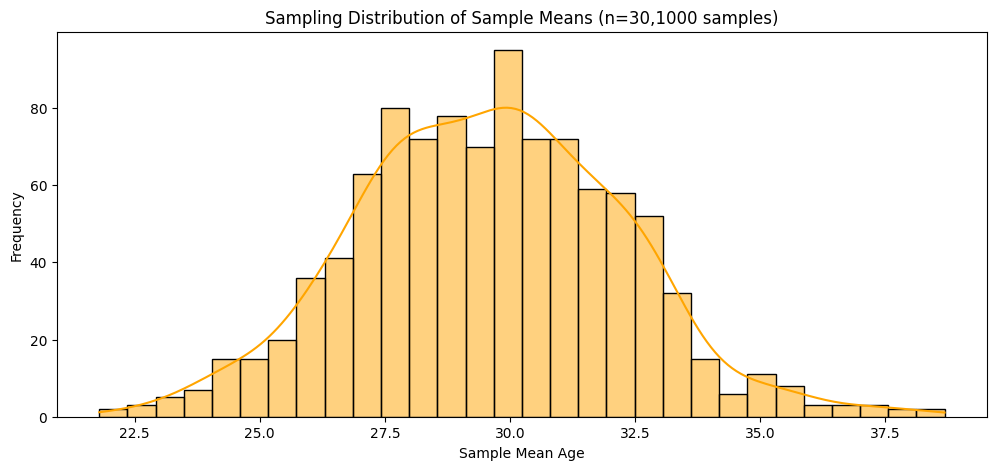

In [35]:
#Step 4: Plot distribution of sample means
plt.figure(figsize=(12,5))
sns.histplot(sample_means,bins=30,kde=True,color='orange')
plt.title(f'Sampling Distribution of Sample Means (n={sample_size},{num_samples} samples)')
plt.xlabel('Sample Mean Age')
plt.ylabel('Frequency')
plt.show()

In [36]:
#Step 5: Show mean comparison
print(f'Mean of original ages: {ages.mean():.2f}')
print(f'Mean of sample means: {sample_means.mean():.2f}')
print(f'Standard Deviation of sample means (Standard Error): {sample_means.std():.2f}')

Mean of original ages: 29.70
Mean of sample means: 29.59
Standard Deviation of sample means (Standard Error): 2.66


In [37]:
from scipy.stats import ttest_ind
#Drop rows where age or survived is missing
df = titanic[['age','survived']].dropna()

#Separate age data into two groups: survived=1,not survived = 0
age_survived = df[df['survived']==1]['age']
age_not_survived = df[df['survived']==0]['age']

In [38]:
#Perform two-sample t-test (Welch's t-test)
t_stat,p_value = ttest_ind(age_survived,age_not_survived,equal_var=False)
print(f't_stat:{t_stat:.4f}')
print(f'p_val:{p_value:.4f}')

t_stat:-2.0460
p_val:0.0412


In [39]:
titanic = sns.load_dataset('titanic')

In [40]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
#Chi2 contingency
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(titanic['survived'],titanic['sex'])

In [42]:
#Perform chi2 test of independence
chi2,p,dof,expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f'P-value: {p:.4f}')

Chi-square statistic: 260.7170
P-value: 0.0000


In [43]:
import seaborn as sns
from scipy.stats import f_oneway

#Load titanic dataset
titanic = sns.load_dataset('titanic')


In [44]:
#Drop missing age values and group by class
class1_age = titanic[titanic['pclass']==1]['age'].dropna()
class2_age = titanic[titanic['pclass']==2]['age'].dropna()
class3_age = titanic[titanic['pclass']==3]['age'].dropna()

In [45]:
#Perform One-way ANOVA
f_stat,p_val = f_oneway(class1_age,class2_age,class3_age)
print(f'F-statistic:{f_stat:.4f}')
print(f'P-value:{p_val:.4f}')

F-statistic:57.4435
P-value:0.0000


In [48]:
pip install statsmodels

  Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl (9.6 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmod


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
#two way anova
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [54]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic = titanic.dropna(subset = ['age','pclass','sex'])

In [56]:
#Fit the two-way ANOVA model with interaction term
model = ols('age ~ C(pclass) + C(sex) + C(pclass):C(sex)',data=titanic).fit()

In [58]:
#Perform the ANOVA
anova_table = sm.stats.anova_lm(model,typ=2)
print(anova_table)

                         sum_sq     df          F        PR(>F)
C(pclass)          23010.355131    2.0  64.825107  1.404675e-26
C(sex)              3389.132827    1.0  19.095829  1.429337e-05
C(pclass):C(sex)     481.844296    2.0   1.357459  2.579827e-01
Residual          125656.031067  708.0        NaN           NaN


In [71]:
titanic = sns.load_dataset('titanic').dropna(subset='age')

In [73]:
from scipy.stats import shapiro
age_data = titanic['age']
#Perform Shapiro-Wilk test
stat,p = shapiro(age_data)
print(f'Shapiro-Wilk test statistic = {stat:.4f},p-value = {p:.4f}')
if p<0.05:
    print("Fail to reject H0: Age data looks approximately normal")
else:
    print('Reject H0: Age data does NOT look normal')

Shapiro-Wilk test statistic = 0.9815,p-value = 0.0000
Fail to reject H0: Age data looks approximately normal


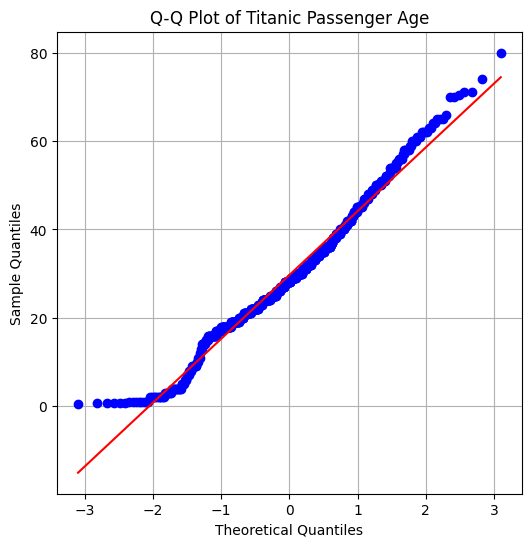

In [75]:
from scipy import stats
#Create Q-Q plot
plt.figure(figsize=(6,6))
stats.probplot(age_data,dist='norm',plot=plt)
plt.title('Q-Q Plot of Titanic Passenger Age')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [79]:
from scipy.stats import levene
#Extract age values for each passenger class, dropping NaNs
age_pclass_1 = titanic.loc[titanic['pclass']==1,'age'].dropna()
age_pclass_2 = titanic.loc[titanic['pclass']==2,'age'].dropna()
age_pclass_3 = titanic.loc[titanic['pclass']==3,'age'].dropna()

In [80]:
#Perform Levene's test
stat,p = levene(age_pclass_1,age_pclass_2,age_pclass_3)
print(f"Levene's test statistic={stat:.4f},p-value={p:.4f}")
if p>0.05:
    print('Fail to reject H0: Age variances are equal across passenger classes')
else:
    print('Reject H0: Age variances differ across passenger classes')

Levene's test statistic=5.6202,p-value=0.0038
Reject H0: Age variances differ across passenger classes
